In [1]:
import cv2

import numpy as np

from skimage.color import rgb2gray

from skimage import io

from scipy import stats

import matplotlib.pyplot as plt

In [71]:
img = cv2.imread("images/compostable_spoons/IMG 15.jpg")

print(type(img))

<class 'numpy.ndarray'>


In [72]:
rows,cols = img.shape[0:2]

print(rows,cols)

2829 973


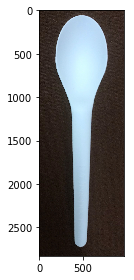

In [73]:
%matplotlib inline

io.imshow(img)

In [74]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

retval, thresh = cv2.threshold(gray_img, 127, 255, 0)

img_contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours = cv2.drawContours(img, img_contours, -1, (0, 255, 0))

_, thresh = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

img_contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]

In [75]:
img_contours = sorted(img_contours, key=cv2.contourArea)
 
for i in img_contours:
 
    if cv2.contourArea(i) > 100:
 
        break

In [76]:
mask = np.zeros(img.shape[:2], np.uint8)

cv2.drawContours(mask, [i],-1, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

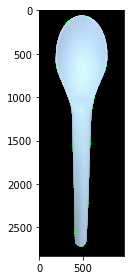

In [77]:
new_img = cv2.bitwise_and(img, img, mask=mask)
io.imshow(new_img)

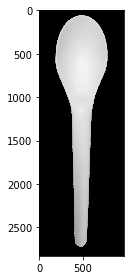

In [78]:
grayscale = rgb2gray(new_img)

io.imshow(grayscale)

In [10]:
listy = []
for x in range (1,rows):
        for y in range (1,cols):
            pixel = grayscale[x,y]
            #print (pixel)
            if pixel > 0.0:
                listy.append(pixel)
print(listy)

[0.36862745098039224, 0.3764705882352941, 0.380392156862745, 0.38431372549019605, 0.38823529411764707, 0.392156862745098, 0.396078431372549, 0.396078431372549, 0.396078431372549, 0.396078431372549, 0.396078431372549, 0.392156862745098, 0.380392156862745, 0.3647058823529412, 0.3647058823529412, 0.3764705882352941, 0.38431372549019605, 0.392156862745098, 0.4, 0.40784313725490196, 0.4156862745098039, 0.4196078431372549, 0.4196078431372549, 0.42745098039215684, 0.43137254901960786, 0.4352941176470588, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.43137254901960786, 0.4352941176470588, 0.4352941176470588, 0.4392156862745098, 0.44313725490196076, 0.44705882352941173, 0.45098039215686275, 0.4588235294117647, 0.4666666666666667, 0.47058823529411764, 0.47058823529411764, 0.4745098039215686, 0.4784313725490196, 0.4784313725490196, 0.4823529411764706, 0.4823529411764706, 0.4823529411764706, 0.4823529411764706, 0.4784313725490196, 0.4745098039215686, 0.47058823529411764, 0.46274

In [11]:
print(listy[-1])

0.36862745098039224


In [12]:
count = len(listy); print(count)

mean = np.mean(listy); print(mean)

median = np.median(listy); print(median)

mode = stats.mode(listy); print(mode)

67285
0.7183166533868954
0.7154
ModeResult(mode=array([0.87843137]), count=array([4332]))


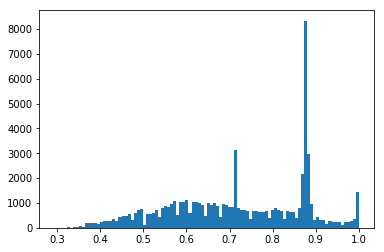

In [13]:
plt.hist(listy,100)
plt.show()

In [14]:
print(np.max(listy))

print(np.min(listy))

print(np.sort(listy))

1.0
0.2941176470588236
[0.29411765 0.30588235 0.30588235 ... 1.         1.         1.        ]
